In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report

import tensorflow as tf
import tensorflow.keras.layers as tfl
import tensorflow.keras.models as tfm
from tensorflow.keras.applications.resnet50 import ResNet50


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_test = x_test.reshape((x_test.shape[0], 28, 28))
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255

x_train = np.stack((x_train , )*3 , axis=-1)
x_test = np.stack((x_test , )*3 , axis=-1)

In [4]:
x_train.shape

(60000, 28, 28, 3)

In [9]:
base_model = ResNet50(weights='imagenet', include_top=False)
base_model.trainable = False



In [10]:
model = tfm.Sequential()

model.add(base_model)

model.add(tfl.GlobalAveragePooling2D())
model.add(tfl.Dense(256, activation='relu'))
model.add(tfl.Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24114826 (91.99 MB)
Trainable params: 527114 (2.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [12]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 30s 14ms/step - loss: 0.5743 - accuracy: 0.8207 - val_loss: 0.3126 - val_accuracy: 0.9040
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3232 - accuracy: 0.8971 - val_loss: 0.2617 - val_accuracy: 0.9158
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2773 - accuracy: 0.9099 - val_loss: 0.2581 - val_accuracy: 0.9184
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2462 - accuracy: 0.9200 - val_loss: 0.2159 - val_accuracy: 0.9303
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2285 - accuracy: 0.9252 - val_loss: 0.2310 - val_accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2098 - accuracy: 0.9319 - val_loss: 0.1978 - val_accuracy: 0.9384
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2015 - accuracy: 0.9349 - val_loss: 0.1948 -

313/313 [==============================] - 4s 9ms/step


<Axes: >

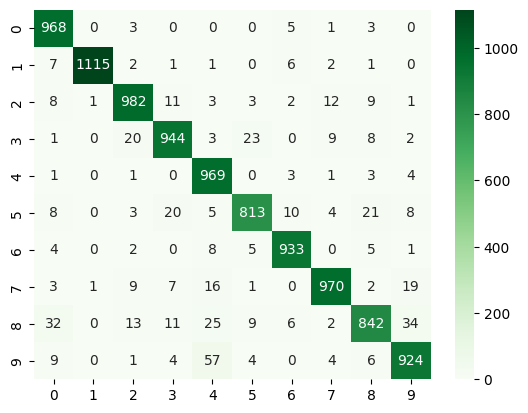

In [13]:
y_test_pred_res = np.argmax(model.predict(x_test) , axis=1)
convmat_res = confusion_matrix(y_test , y_test_pred_res)
sns.heatmap(convmat_res , annot=True , fmt='d',cmap = 'Greens')

In [14]:
print(classification_report(y_test , y_test_pred_res))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       1.00      0.98      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.95      0.93      0.94      1010
           4       0.89      0.99      0.94       982
           5       0.95      0.91      0.93       892
           6       0.97      0.97      0.97       958
           7       0.97      0.94      0.95      1028
           8       0.94      0.86      0.90       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

